<a href="https://colab.research.google.com/github/njgeorge000158/Student-Loan-Repayment-Prediction-with-Deep-Learning/blob/main/student_loans_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
firef

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
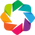

In [31]:
#*******************************************************************************************
 #
 #  File Name:  student_loans_colab.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, student_loans_colab.ipynb, reads a csv file,
 #      student_loans.csv, and uses deep learning methods to process the features
 #      in the provided dataset and create a binary classifier that can predict
 #      whether student loan applicants will default or not.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  04/15/2024      Initial Development                     Nicholas J. George
 #
 #******************************************************************************************/

from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.insert(0,'./gdrive/MyDrive/student_loan_prediction')

import os
os.environ['HV_DOC_HTML'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

!apt-get update
!apt install firefox
!pip install -U geckodriver
!pip install -U dataframe_image
!pip install -U selenium
!pip install -U kaleido
!pip install -U hvplot
!pip install -U plotly
!pip install -U panel
!pip install -U bokeh
!pip install -U imblearn
!pip install -U silence-tensorflow
!pip install -U keras-tuner

import hvplot
import hvplot.pandas

import pandas as pd

import holoviews as hv
hv.extension('bokeh')

import logx
logx.set_logs_directory_path('./gdrive/MyDrive/student_loan_prediction/logs')
logx.set_images_directory_path('./gdrive/MyDrive/student_loan_prediction/images')
logx.set_resources_directory_path('./gdrive/MyDrive/credit_risk_classification/resources')
logx.set_models_directory_path('./gdrive/MyDrive/credit_risk_classification/models')
logx.create_directory(logx.MODELS_DIRECTORY_PATH)

import pandasx
pandasx.set_google_colab(True)

import deep_learningx
import logx
import pandasx
import student_loans_constants

import copy
import pickle

import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from silence_tensorflow import silence_tensorflow
silence_tensorflow()

pd.options.mode.chained_assignment = None

In [32]:
CONSTANT_LOCAL_FILE_NAME = 'student_loans_colab.ipynb'


logx.set_log_mode(False)

logx.set_image_mode(False)


logx.begin_program('student_loans_colab')

# <br> **Section 1: Extraction**

## **1.1: Read the CSV data into a Pandas DataFrame**

In [33]:
student_loan_dataframe = pd.read_csv(student_loans_constants.CONSTANT_INPUT_FILE_PATH)

logx.log_write_object(student_loan_dataframe)

## **1.2: Display Student Loan DataFrame**

In [34]:
pandasx.return_formatted_table(student_loan_dataframe, 'Table 1.2: Student Loan Table')

payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5
7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5
7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00,7
7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50,7
7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5


# <br> **Section 2: Preprocessing**

## **2.1: Create the labels series (`y`)  from the “spam” column, and then create the features (`X`) DataFrame from the remaining columns.**

### **Separate the Y Variable, the Labels**

In [35]:
y_series = student_loan_dataframe['credit_ranking']

logx.log_write_object(y_series)

In [36]:
y_series.value_counts()

credit_ranking
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### **Separate the X Variable, the Features**

In [37]:
x_dataframe = student_loan_dataframe.drop(columns = 'credit_ranking', axis = 1)

logx.log_write_object(x_dataframe)

In [38]:
pandasx.return_formatted_table(x_dataframe, 'Table 2.1: Student Loan Features DataFrame')

payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40
7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80
7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80
11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80
7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40
7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40
7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40
7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00
7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50
7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50


## **2.2: Split the Data into Training and Testing Datasets by Using `train_test_split`.**

In [39]:
x_train_dataframe, x_test_dataframe, \
y_train_series, y_test_series \
    = train_test_split \
        (x_dataframe, y_series,
         random_state = student_loans_constants.CONSTANT_DL_RANDOM_STATE_1)

In [40]:
logx.log_write_object(x_train_dataframe)

logx.log_write_object(x_test_dataframe)

logx.log_write_object(y_train_series)

logx.log_write_object(y_test_series)

## **2.3: Use the StandardScaler to Scale the X Variables**

### **Create a StandardScaler Instance**

In [41]:
current_standard_scalar = StandardScaler()

### **Fit the StandardScaler**

In [42]:
x_standard_scalar = current_standard_scalar.fit(x_train_dataframe)

### **Scale the Data**

In [43]:
x_train_scaled_nparray = x_standard_scalar.transform(x_train_dataframe)

logx.log_write_object(x_train_scaled_nparray)

In [44]:
x_test_scaled_nparray = x_standard_scalar.transform(x_test_dataframe)

logx.log_write_object(x_test_scaled_nparray)

# <br> **Section 3: Compile, Train, Evaluate, and Export the Model**

## **3.1: Compile Model**

### **Model Definition**

In [45]:
number_input_features_integer = len(x_train_scaled_nparray[0])

logx.print_and_log_text \
    ('\033[1m'
     + 'The number of inputs (features) in the model is {:,}.' \
         .format(number_input_features_integer)
     + '\033[0m')

The number of inputs (features) in the model is 11.


In [46]:
input_layer_units_integer = 97

input_layer_activation_string = 'elu'

logx.print_and_log_text \
    ('\033[1m'
     + 'The number of nodes in the input layer is {:,}.' \
         .format(input_layer_units_integer)
     + '\033[0m')

The number of nodes in the input layer is 97.


In [47]:
hidden_layer_units_integer = 46

hidden_layer_activation_string = 'elu'

logx.print_and_log_text \
    ('\033[1m'
     + 'The number of nodes in the hidden layer is {:,}.' \
         .format(hidden_layer_units_integer)
     + '\033[0m')

The number of nodes in the hidden layer is 46.


In [48]:
output_layer_units_integer = 1

output_layer_activation_string = 'linear'

logx.print_and_log_text \
    ('\033[1m'
     + 'The number of nodes in the output layer is {:,}.' \
         .format(output_layer_units_integer)
     + '\033[0m')

The number of nodes in the output layer is 1.


### **Instantiate the Model**

In [49]:
neural_network_sequential_model = tf.keras.models.Sequential()

### **Layers**

In [50]:
neural_network_sequential_model.add \
    (tf.keras.layers.Dense \
         (units = input_layer_units_integer,
          activation = input_layer_activation_string,
          input_dim = number_input_features_integer))

neural_network_sequential_model.add(tf.keras.layers.Dropout(0.064))

neural_network_sequential_model.add \
    (tf.keras.layers.Dense \
         (units = hidden_layer_units_integer,
          activation = hidden_layer_activation_string))

neural_network_sequential_model.add(tf.keras.layers.Dropout(0.138))

neural_network_sequential_model.add \
    (tf.keras.layers.Dense \
         (units = output_layer_units_integer,
          activation = output_layer_activation_string))

### **Model Summary**

In [51]:
neural_network_sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 97)                1164      
                                                                 
 dropout_2 (Dropout)         (None, 97)                0         
                                                                 
 dense_4 (Dense)             (None, 46)                4508      
                                                                 
 dropout_3 (Dropout)         (None, 46)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 47        
                                                                 
Total params: 5719 (22.34 KB)
Trainable params: 5719 (22.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Compile**

In [52]:
neural_network_sequential_model.compile \
    (loss = 'mean_squared_error',
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0024865),
     metrics = ['mse'])

## **3.2: Fit and Train Model**

In [53]:
earlystopping_callback \
    = tf.keras.callbacks.EarlyStopping  \
        (monitor = 'val_mse', mode = 'min', patience = 100, restore_best_weights = True)

neural_network_sequential_model \
    .fit \
        (x_train_scaled_nparray,
         y_train_series.values,
         epochs = 1000,
         validation_data = (x_test_scaled_nparray, y_test_series.values),
         callbacks = [earlystopping_callback])

Epoch 1/1000
38/38 [==============================] - 2s 12ms/step - loss: 15.5164 - mse: 15.5164 - val_loss: 2.2878 - val_mse: 2.2878
Epoch 2/1000
38/38 [==============================] - 0s 5ms/step - loss: 2.1024 - mse: 2.1024 - val_loss: 1.0762 - val_mse: 1.0762
Epoch 3/1000
38/38 [==============================] - 0s 12ms/step - loss: 1.2440 - mse: 1.2440 - val_loss: 0.6654 - val_mse: 0.6654
Epoch 4/1000
38/38 [==============================] - 0s 12ms/step - loss: 1.0043 - mse: 1.0043 - val_loss: 0.6758 - val_mse: 0.6758
Epoch 5/1000
38/38 [==============================] - 1s 13ms/step - loss: 0.9287 - mse: 0.9287 - val_loss: 0.5650 - val_mse: 0.5650
Epoch 6/1000
38/38 [==============================] - 1s 14ms/step - loss: 0.8223 - mse: 0.8223 - val_loss: 0.5295 - val_mse: 0.5295
Epoch 7/1000
38/38 [==============================] - 1s 13ms/step - loss: 0.7746 - mse: 0.7746 - val_loss: 0.4690 - val_mse: 0.4690
Epoch 8/1000
38/38 [==============================] - 0s 11ms/step -

## **3.3: Evaluate Model**

In [54]:
model_loss_float, model_mse_float \
    = neural_network_sequential_model.evaluate(x_test_scaled_nparray, y_test_series.values, verbose = 2)

logx.print_and_log_text \
    (f'\nModel Loss: {round(model_loss_float * 100, 2)}%, '
     + f'Model MSE: {round(model_mse_float * 100, 2)}%')

13/13 - 0s - loss: 0.3493 - mse: 0.3493 - 61ms/epoch - 5ms/step

Model Loss: 34.93%, Model MSE: 34.93%


## **3.4: Save and Export Model**

In [55]:
neural_network_sequential_model.save(student_loans_constants.CONSTANT_NN_MODEL_FILE_PATH)

# <br> **Section 4: Predict Loan Repayment Success**

## **4.1: Reload Model**

In [56]:
reloaded_neural_network_sequential_model \
    = tf.keras.models.load_model \
        (student_loans_constants.CONSTANT_NN_MODEL_FILE_PATH)

## **4.2: Predictions**

In [57]:
predictions_nparray \
    = reloaded_neural_network_sequential_model.predict \
        (x_test_scaled_nparray).round().astype('int32')

13/13 [==============================] - 0s 3ms/step


## **4.3: Compare Predictions and Actual Values**

In [58]:
comparison_dataframe \
    = pd.DataFrame({'predictions': predictions_nparray.ravel(), 'actual': y_test_series.values})

In [59]:
pandasx.return_formatted_table \
    (comparison_dataframe, 'Table 4.3: Model Predictions vs. Actual Values')

predictions,actual
6,6
6,6
5,5
6,6
6,6
6,7
5,4
5,5
5,5
5,5


In [60]:
# logx.end_program()